#### TASK 3 RESULTS :

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

This is the results of the task 3 : 

In [83]:
# transform the file in csv
read_file = pd.read_csv(r'losses_and_results/results_task_3.txt')
read_file.to_csv (r'losses_and_results/results_task_3.csv', index=None)

# read the csv file
df_task_3 = pd.read_csv("losses_and_results/results_task_3.csv")

df_task_3 = df_task_3.rename(columns={"Non_rhymes\t": "Non_rhymes"})
df_task_3 = df_task_3.rename(columns={"Accuracy": "Percentage"})
df_task_3 = df_task_3.rename(columns={"Name": "Time"})

In [84]:
df_task_3['ratio_keeped'] = 100-df_task_3['rhymes']*200/(df_task_3['rhymes']*2+df_task_3['discarded'])

In [85]:
df_task_3

,Time,Size,rhymes,discarded,Epochs,Percentage,Perfect,Assonant,Non_rhymes,ratio_keeped
0,baseline,328,4123,0,0,7.6140,4.3035,6.6208,89.0756,0.000000
1,epoch10,51,292,664,10,25.1712,20.8900,8.5616,70.5479,53.205128
2,epoch20,52,322,619,20,31.9876,27.3292,9.3168,63.3540,49.010293
3,epoch30,52,328,585,30,35.2134,30.7927,8.8415,60.3659,47.139404
4,epoch40,52,314,612,40,36.6242,33.1210,7.0064,59.8726,49.354839
5,epoch50,52,326,567,50,41.2577,36.8098,8.8957,54.2945,46.513536
6,epoch60,52,314,585,60,39.3312,35.9873,6.6879,57.3248,48.227535
7,epoch70,52,310,590,70,44.0323,39.6774,8.7097,51.6129,48.760331
8,epoch80,52,310,565,80,44.5161,40.9677,7.0968,51.9355,47.679325
9,epoch90,52,306,587,90,46.8954,42.1569,9.4771,48.3660,48.957465


In [86]:
# ratio keeped
df3 = df_task_3.drop(index=0, axis=0)

df3['ratio_keeped'].describe()

count    10.000000
mean     48.757451
std       1.805547
min      46.513536
25%      47.816377
50%      48.743493
75%      48.997086
max      53.205128
Name: ratio_keeped, dtype: float64

<AxesSubplot: xlabel='Time', ylabel='Percentage'>

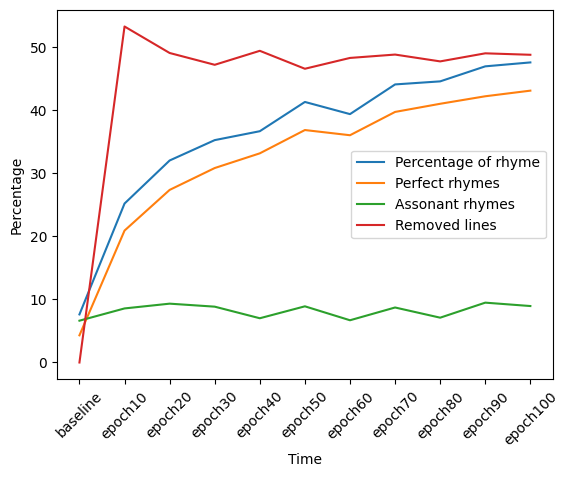

In [87]:
plt.xticks(rotation=45)
sns.lineplot(df_task_3, x="Time", y="Percentage", label='Percentage of rhyme')
sns.lineplot(df_task_3, x="Time", y="Perfect", label='Perfect rhymes')
sns.lineplot(df_task_3, x="Time", y="Assonant", label='Assonant rhymes')
sns.lineplot(df_task_3, x="Time", y="ratio_keeped", label='Removed lines')

<AxesSubplot: xlabel='Time', ylabel='Non_rhymes'>

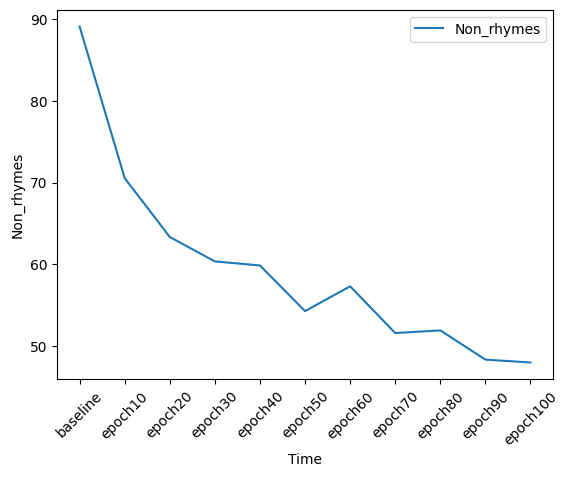

In [88]:
plt.xticks(rotation=45)
sns.lineplot(df_task_3, x="Time", y="Non_rhymes", label='Non_rhymes')

<AxesSubplot: xlabel='Time', ylabel='ratio_keeped'>

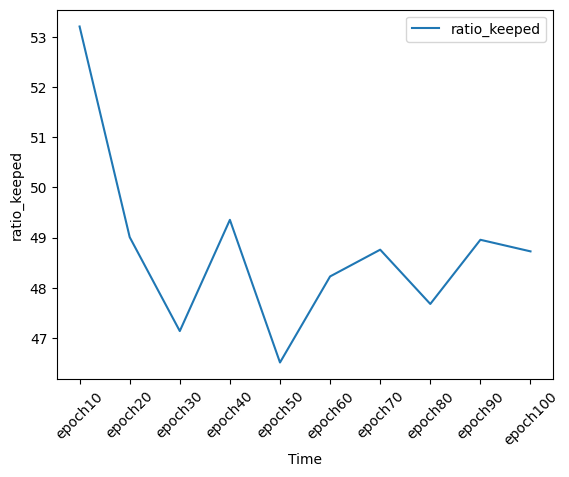

In [89]:
# ratio keeped
df3 = df_task_3.drop(index=0, axis=0)

plt.xticks(rotation=45)
sns.lineplot(df3, x="Time", y="ratio_keeped", label='ratio_keeped')

# enlever la baseline

In [90]:
def process_data_frame(df):
    new_df = pd.DataFrame()
    new_df['epoch'] = df.apply(lambda x: x['epoch'])
    new_df['learning_rate'] = df.apply(lambda x: x.get('learning_rate'))
    new_df['loss'] = df.apply(lambda x: x.get('loss'))
    new_df['step'] = df.apply(lambda x: x.get('step'))
    return new_df

In [91]:
def plot_df(df):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(df['epoch'], df["learning_rate"], label='learning_rate', color='m')
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("learning_rate")
    ax1.legend()


    ax2.plot(df['epoch'], df["loss"], label='loss')
    ax2.set_xlabel("epoch")
    ax2.set_ylabel("loss")
    ax2.legend()

This is the result every 10 epochs (from 10 to 100 epochs).
For each step of 10 epochs, we have a json file that contains the log of the training.
By running all theses cells you'll retreive the informations of each 10 epochs and plot the learning rate and the training loss.

The goal here is to scrap the json files from the checkpoint, at each 10 epochs step for the training of our model.
With this, we'll gather information about :

-Epochs

-Learning rate

-loss

-step number

In [92]:
df_ABAB_10 = pd.read_json('checkpoints_task_3/checkpoint-4000_ABAB_10/trainer_state.json')['log_history']

In [93]:
df_log_ABAB_10 = process_data_frame(df_ABAB_10).dropna()

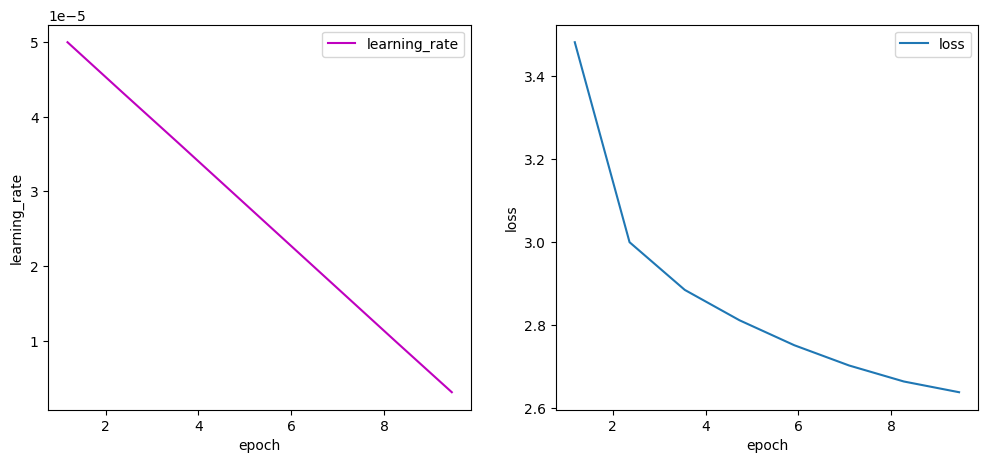

In [94]:
plot_df(df_log_ABAB_10)

In [95]:
df_ABAB_20 = pd.read_json('checkpoints_task_3/checkpoint-4000_ABAB_20/trainer_state.json')['log_history']

In [96]:
df_log_ABAB_20 = process_data_frame(df_ABAB_20).dropna()

,epoch,learning_rate,loss,step
0,1.18,0.000050,2.9904,500
1,2.36,0.000043,2.9131,1000
3,3.55,0.000037,2.8281,1500
4,4.73,0.000030,2.7589,2000
6,5.91,0.000023,2.7039,2500


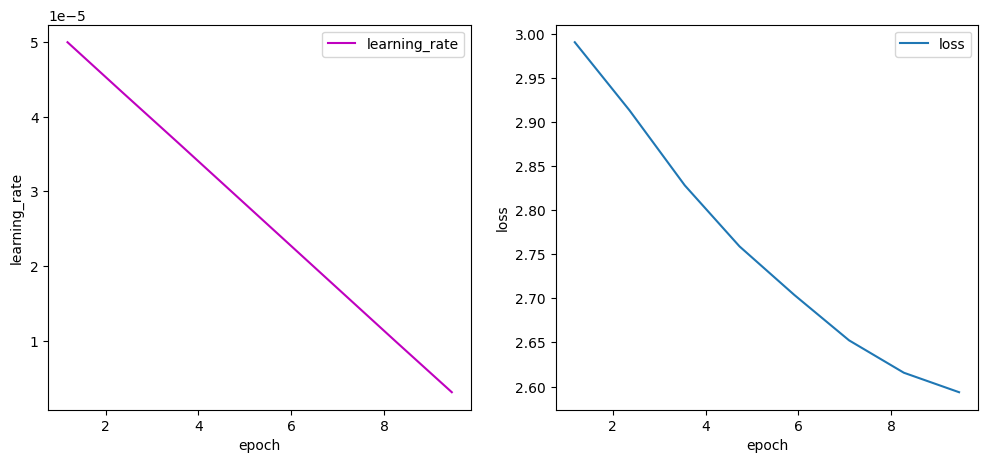

In [97]:
plot_df(df_log_ABAB_20)

df_log_ABAB_20.head()

In [98]:
df_ABAB_30 = pd.read_json('checkpoints_task_3/checkpoint-4000_ABAB_30/trainer_state.json')['log_history']

In [99]:
df_log_ABAB_30 = process_data_frame(df_ABAB_30).dropna()

,epoch,learning_rate,loss,step
0,1.18,0.000050,2.7074,500
1,2.36,0.000043,2.6242,1000
3,3.55,0.000037,2.5387,1500
4,4.73,0.000030,2.4773,2000
6,5.91,0.000023,2.4266,2500


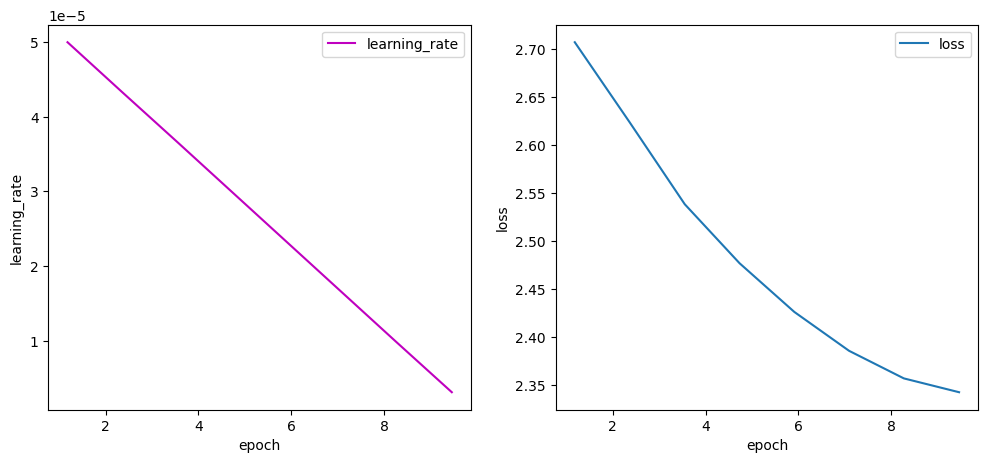

In [100]:
plot_df(df_log_ABAB_30)

df_log_ABAB_30.head()

In [101]:
df_ABAB_40 = pd.read_json('checkpoints_task_3/checkpoint-4000_ABAB_40/trainer_state.json')['log_history']

In [102]:
df_log_ABAB_40 = process_data_frame(df_ABAB_40).dropna()

,epoch,learning_rate,loss,step
0,1.18,0.000050,2.6858,500
1,2.36,0.000043,2.5851,1000
3,3.55,0.000037,2.5059,1500
4,4.73,0.000030,2.4450,2000
6,5.91,0.000023,2.3983,2500
7,7.09,0.000016,2.3551,3000
9,8.27,0.000010,2.3286,3500
10,9.46,0.000003,2.3181,4000


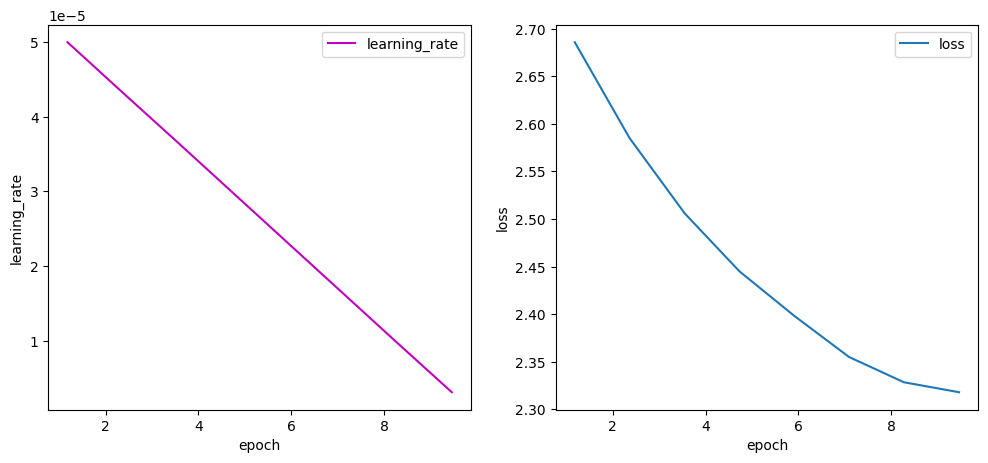

In [103]:
plot_df(df_log_ABAB_40)

df_log_ABAB_40

In [104]:
df_ABAB_50 = pd.read_json('checkpoints_task_3/checkpoint-4000_ABAB_50/trainer_state.json')['log_history']

In [105]:
df_log_ABAB_50 = process_data_frame(df_ABAB_50).dropna()

,epoch,learning_rate,loss,step
0,1.18,0.000050,2.4434,500
1,2.36,0.000043,2.3093,1000
3,3.55,0.000037,2.2243,1500
4,4.73,0.000030,2.1709,2000
6,5.91,0.000023,2.1319,2500


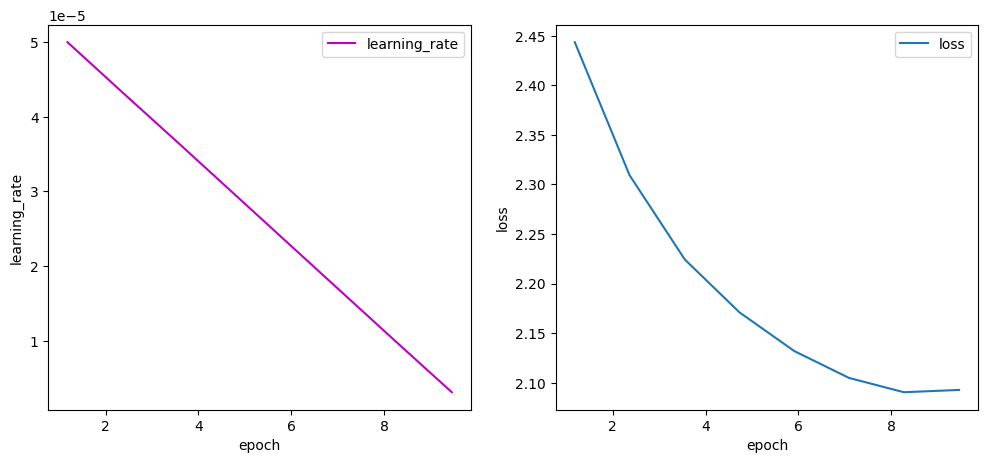

In [106]:
plot_df(df_log_ABAB_50)

df_log_ABAB_50.head()

In [107]:
df_ABAB_60 = pd.read_json('checkpoints_task_3/checkpoint-4000_ABAB_60/trainer_state.json')['log_history']

In [108]:
df_log_ABAB_60 = process_data_frame(df_ABAB_60).dropna()

,epoch,learning_rate,loss,step
0,1.18,0.000050,2.4185,500
1,2.36,0.000043,2.2682,1000
3,3.55,0.000037,2.1944,1500
4,4.73,0.000030,2.1438,2000
6,5.91,0.000023,2.1108,2500


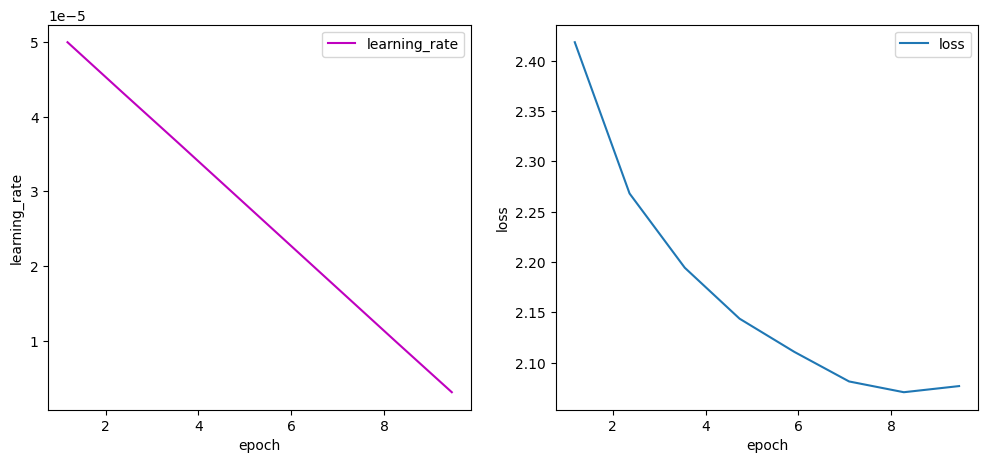

In [109]:
plot_df(df_log_ABAB_60)

df_log_ABAB_60.head()

In [110]:
df_ABAB_70 = pd.read_json('checkpoints_task_3/checkpoint-4000_ABAB_70/trainer_state.json')['log_history']

In [111]:
df_log_ABAB_70 = process_data_frame(df_ABAB_70).dropna()

,epoch,learning_rate,loss,step
0,1.18,0.000050,2.1829,500
1,2.36,0.000043,1.9882,1000
3,3.55,0.000037,1.9164,1500
4,4.73,0.000030,1.8800,2000
6,5.91,0.000023,1.8583,2500


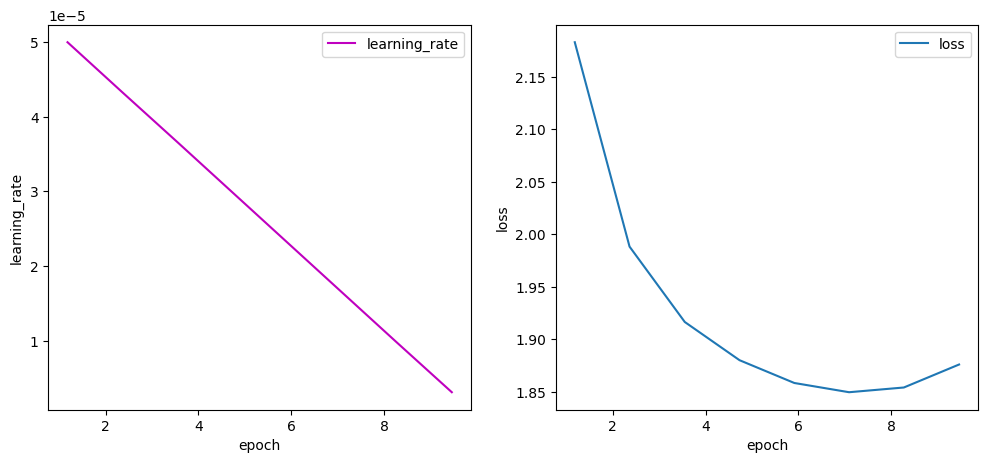

In [112]:
plot_df(df_log_ABAB_70)

df_log_ABAB_70.head()

In [113]:
df_ABAB_80 = pd.read_json('checkpoints_task_3/checkpoint-4000_ABAB_80/trainer_state.json')['log_history']

In [114]:
df_log_ABAB_80 = process_data_frame(df_ABAB_80).dropna()

,epoch,learning_rate,loss,step
0,1.18,0.000050,2.1578,500
1,2.36,0.000043,1.9492,1000
3,3.55,0.000037,1.8904,1500
4,4.73,0.000030,1.8549,2000
6,5.91,0.000023,1.8419,2500


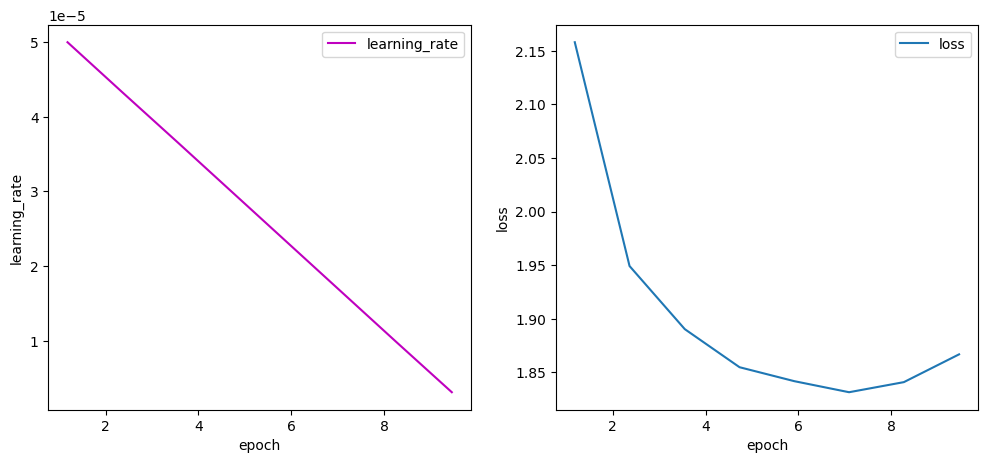

In [115]:
plot_df(df_log_ABAB_80)

df_log_ABAB_80.head()

In [116]:
df_ABAB_90 = pd.read_json('checkpoints_task_3/checkpoint-4000_ABAB_90/trainer_state.json')['log_history']

In [117]:
df_log_ABAB_90 = process_data_frame(df_ABAB_90).dropna()

,epoch,learning_rate,loss,step
0,1.18,0.000050,1.9345,500
1,2.36,0.000043,1.6802,1000
3,3.55,0.000037,1.6265,1500
4,4.73,0.000030,1.6100,2000
6,5.91,0.000023,1.6081,2500


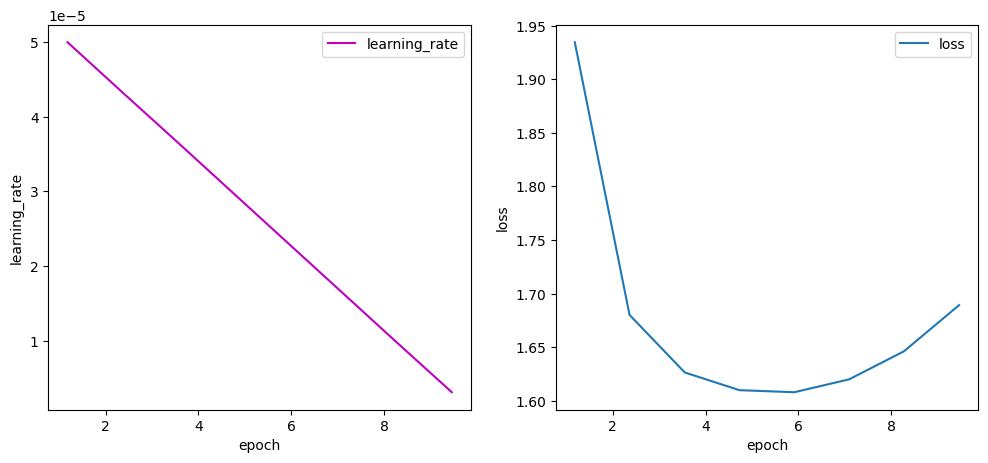

In [118]:
plot_df(df_log_ABAB_90)

df_log_ABAB_90.head()

In [119]:
df_ABAB_100 = pd.read_json('checkpoints_task_3/checkpoint-4000_ABAB_100/trainer_state.json')['log_history']

In [120]:
df_log_ABAB_100 = process_data_frame(df_ABAB_100).dropna()

,epoch,learning_rate,loss,step
0,1.18,0.000050,1.9114,500
1,2.36,0.000043,1.6412,1000
3,3.55,0.000037,1.6016,1500
4,4.73,0.000030,1.5844,2000
6,5.91,0.000023,1.5941,2500
7,7.09,0.000016,1.6063,3000
9,8.27,0.000010,1.6381,3500
10,9.46,0.000003,1.6861,4000


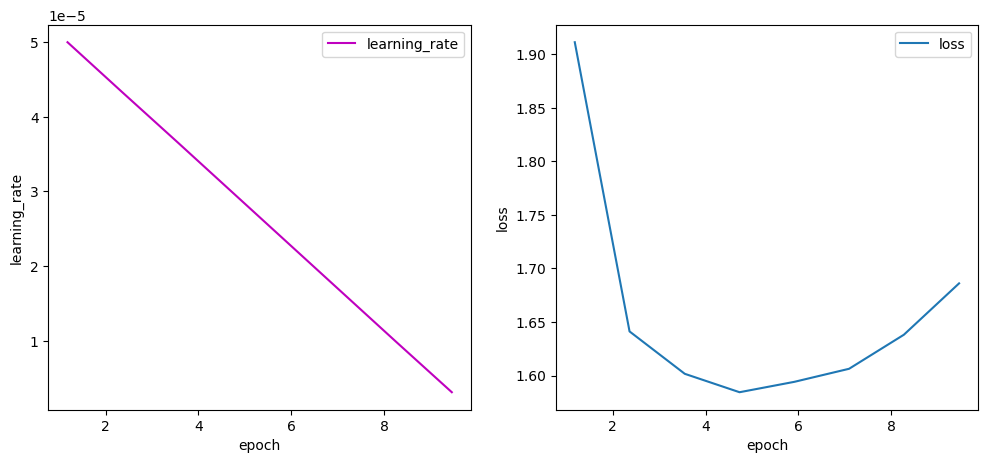

In [121]:
plot_df(df_log_ABAB_100)

df_log_ABAB_100

Let's concat all df_logs to plot training loss from epoch 20 to epoch 100

In [122]:
frames = [df_log_ABAB_10, df_log_ABAB_20, df_log_ABAB_30, df_log_ABAB_40, df_log_ABAB_50, df_log_ABAB_60, df_log_ABAB_70, df_log_ABAB_80, df_log_ABAB_90, df_log_ABAB_100]

In [123]:
result = pd.concat(frames)

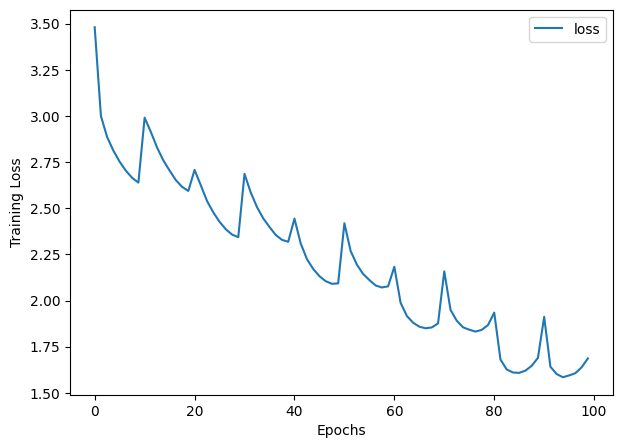

In [124]:
x = range(0, len(result), 1)
x_df = pd.DataFrame(x)
x_df = x_df.apply(lambda elem: (elem/8) * 10)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(x_df, result['loss'], label='loss')
ax.set_xlabel("Epochs")
ax.set_ylabel("Training Loss")
ax.legend()

We now plot the TRAINING_LOSS and VALIDATION_LOSS from epoch 0 to 100

In [125]:
# transform the file in csv
read_file = pd.read_csv(r'losses_and_results/losses_exp3.txt')
read_file.to_csv (r'losses_and_results/losses_exp3.csv', index=None)
# read the csv file
df_losses = pd.read_csv("losses_and_results/losses_exp3.csv")

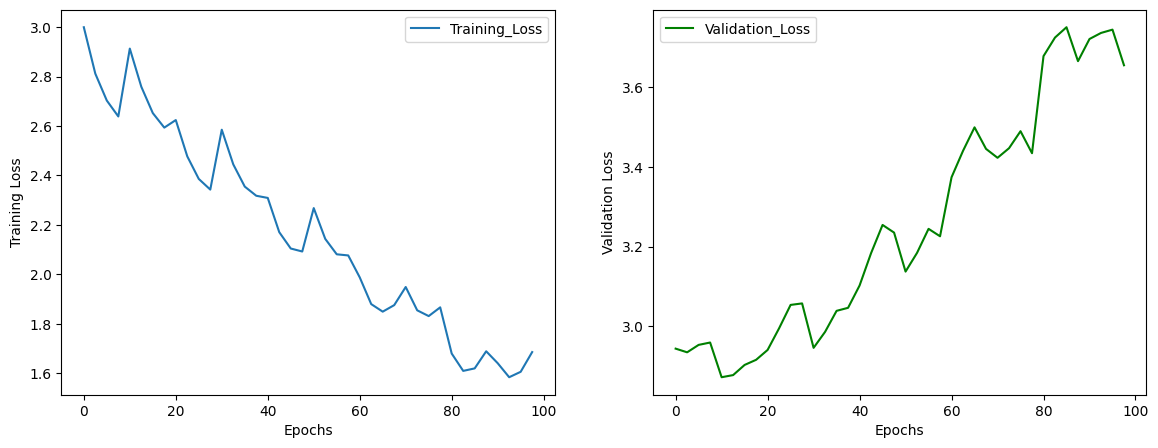

In [126]:
y = range(len(df_losses))
y_df = pd.DataFrame(y)
y_df = y_df.apply(lambda elem: (elem/4) * 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(y_df, df_losses['Training_Loss'], label='Training_Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training Loss")
ax1.legend()

ax2.plot(y_df, df_losses['Validation_Loss'], label='Validation_Loss', color='g')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Validation Loss")
ax2.legend()